# Checkpoint 1

Reminder: 

- You are being evaluated for completion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>).


Include comments throughout your code! Every cleanup and preprocessing task should be documented.

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [20]:
# im just copying the same shortcuts because I don't want to accidently use them as variables and hopefully I'll remember better by repeating things
import numpy as np
import pandas as pd
import matplotlib as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [21]:
# monkey see monkey do
df = pd.read_csv('../data/states_edu.csv')
# me look at data
df
# holy old data and holy NaN's. I should look for the most recent full data :)

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,2019_VIRGINIA,VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,247.0,287.0,224.0,262.0
1711,2019_WASHINGTON,WASHINGTON,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,240.0,286.0,220.0,266.0
1712,2019_WEST_VIRGINIA,WEST_VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,231.0,272.0,213.0,256.0
1713,2019_WISCONSIN,WISCONSIN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,242.0,289.0,220.0,267.0


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [22]:

# primary key is excessive, I'm only going to use the time for it because the state is already another column
# I'm also shortening revenue names as they are pretty intuitive
# Guide said that the grade numbers represented enrollment, I didn't like the previous title so I changed it
df.rename({
    "PRIMARY_KEY":"TIME",
    "TOTAL_REVENUE":"TOT_REV",
    "FEDERAL_REVENUE":"FED_REV",
    "LOCAL_REVENUE":"LOC_REV",
    "TOTAL_EXPENDITURE":"TOT_SPENT",
    "INSTRUCTION_EXPENDITURE":"TEACHING_COSTS",
    "SUPPORT_SERVICES_EXPENDITURE":"SUPPORT_COSTS",
    "OTHER_EXPENDITURE":"OTHER_COSTS",
    "CAPITAL_OUTLAY_EXPENDITURE":"CAPITAL_OUTLAY_COSTS",
    "GRADES_PK_G":"PREK_ENROLL",
    "GRADES_KG_G":"KINDER_ENROLL",
    "GRADES_4_G":"4_ENROLL",
    "GRADES_8_G":"8_ENROLL",
    "GRADES_12_G":"12_ENROLL",
    "GRADES_1_8_G":"PRIMARY_ENROLL",
    "GRADES_9_12_G":"HS_ENROLL",
    "GRADES_ALL_G":"ALL_ENROLL",
    },
    axis=1,inplace=True)
# Dont't care about math 4, reading 4, or reading 8, and everything else listed here
# IDC = list(["AVG_MATH_4_SCORE", "AVG_READING_8_SCORE", "AVG_READING_4_SCORE", "PREK_ENROLL", "KINDER_ENROLL", "4_ENROLL", "12_ENROLL", "PRIMARY_ENROLL", "HS_ENROLL", "ALL_ENROLL"]) <-- I tried cleaning up table but it doesn't work with df.dropna
# Time to remove all NaN values, I would like to somehow sort with consideration of recency AND NaN values, but I don't know how to do that :(
# df.drop(columns=["AVG_MATH_4_SCORE", "AVG_READING_8_SCORE", "AVG_READING_4_SCORE", "PREK_ENROLL", "KINDER_ENROLL", "4_ENROLL", "12_ENROLL", "PRIMARY_ENROLL", "HS_ENROLL", "ALL_ENROLL"])
df = df.dropna() # wait my friend changed this to df=df... somehow it fixed some stuff?
# only one or the other works and I can't figure it out
print(df["YEAR"].nunique())
print(df["YEAR"].unique())
df


7
[2003 2005 2007 2009 2011 2013 2015]


,TIME,STATE,YEAR,ENROLL,TOT_REV,FED_REV,STATE_REVENUE,LOC_REV,TOT_SPENT,TEACHING_COSTS,...,4_ENROLL,8_ENROLL,12_ENROLL,PRIMARY_ENROLL,HS_ENROLL,ALL_ENROLL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
561,2003_ALABAMA,ALABAMA,2003,727900.0,5196054.0,567704.0,2966981.0,1661369.0,5298932.0,2817111.0,...,57323.0,59663.0,42005.0,466920.0,205907.0,731220.0,223.0,262.0,207.0,253.0
562,2003_ALASKA,ALASKA,2003,133303.0,1425948.0,259423.0,813371.0,353154.0,1610289.0,763525.0,...,10115.0,11140.0,8651.0,82337.0,40238.0,133933.0,233.0,279.0,212.0,256.0
563,2003_ARIZONA,ARIZONA,2003,875111.0,6529894.0,740579.0,2912629.0,2876686.0,6210287.0,2810907.0,...,76207.0,76376.0,68815.0,613442.0,307272.0,1012068.0,229.0,271.0,209.0,255.0
564,2003_ARKANSAS,ARKANSAS,2003,450158.0,3241275.0,379947.0,2394336.0,466992.0,3242799.0,1768713.0,...,34070.0,37004.0,28840.0,281834.0,132712.0,454523.0,229.0,266.0,214.0,258.0
565,2003_CALIFORNIA,CALIFORNIA,2003,6226552.0,59815855.0,5795655.0,33617766.0,20402434.0,59749885.0,29561563.0,...,493415.0,500143.0,395194.0,3929869.0,1854518.0,6413867.0,227.0,267.0,206.0,251.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1219,2015_VIRGINIA,VIRGINIA,2015,1279867.0,15857524.0,1012205.0,6240349.0,8604970.0,16113212.0,8755896.0,...,96851.0,95221.0,90391.0,772414.0,386781.0,1283590.0,247.0,288.0,229.0,267.0
1220,2015_WASHINGTON,WASHINGTON,2015,1072359.0,13709442.0,1036422.0,8293812.0,4379208.0,13630138.0,6508964.0,...,82404.0,79483.0,89258.0,656797.0,336808.0,1087030.0,245.0,287.0,226.0,267.0
1221,2015_WEST_VIRGINIA,WEST_VIRGINIA,2015,279565.0,3478401.0,362959.0,1979466.0,1135976.0,3466981.0,1819903.0,...,19814.0,20426.0,18432.0,162070.0,80142.0,277452.0,235.0,271.0,216.0,260.0
1222,2015_WISCONSIN,WISCONSIN,2015,861813.0,11637376.0,814385.0,5869265.0,4953726.0,11553677.0,5723474.0,...,60999.0,61084.0,66253.0,489919.0,263896.0,867800.0,243.0,289.0,223.0,270.0


In [23]:
df.drop(columns=["AVG_MATH_4_SCORE", "AVG_READING_8_SCORE", "AVG_READING_4_SCORE", "PREK_ENROLL", "KINDER_ENROLL", "4_ENROLL", "12_ENROLL", "PRIMARY_ENROLL", "HS_ENROLL", "ALL_ENROLL", "TIME"])
#df.dropna() # <-- I cant both of these to work simultaenously ^^
# only one or the other works and I can't figure it out
# NVM!! Prvious fix of redefining df fixed it I THINK!

,STATE,YEAR,ENROLL,TOT_REV,FED_REV,STATE_REVENUE,LOC_REV,TOT_SPENT,TEACHING_COSTS,SUPPORT_COSTS,OTHER_COSTS,CAPITAL_OUTLAY_COSTS,8_ENROLL,AVG_MATH_8_SCORE
561,ALABAMA,2003,727900.0,5196054.0,567704.0,2966981.0,1661369.0,5298932.0,2817111.0,1521462.0,424662.0,432279.0,59663.0,262.0
562,ALASKA,2003,133303.0,1425948.0,259423.0,813371.0,353154.0,1610289.0,763525.0,514052.0,55715.0,247005.0,11140.0,279.0
563,ARIZONA,2003,875111.0,6529894.0,740579.0,2912629.0,2876686.0,6210287.0,2810907.0,1964229.0,303924.0,864642.0,76376.0,271.0
564,ARKANSAS,2003,450158.0,3241275.0,379947.0,2394336.0,466992.0,3242799.0,1768713.0,972598.0,170767.0,247245.0,37004.0,266.0
565,CALIFORNIA,2003,6226552.0,59815855.0,5795655.0,33617766.0,20402434.0,59749885.0,29561563.0,17030335.0,2995767.0,7341541.0,500143.0,267.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1219,VIRGINIA,2015,1279867.0,15857524.0,1012205.0,6240349.0,8604970.0,16113212.0,8755896.0,5075509.0,627473.0,1086722.0,95221.0,288.0
1220,WASHINGTON,2015,1072359.0,13709442.0,1036422.0,8293812.0,4379208.0,13630138.0,6508964.0,4510672.0,546926.0,1601069.0,79483.0,287.0
1221,WEST_VIRGINIA,2015,279565.0,3478401.0,362959.0,1979466.0,1135976.0,3466981.0,1819903.0,1161944.0,233836.0,232738.0,20426.0,271.0
1222,WISCONSIN,2015,861813.0,11637376.0,814385.0,5869265.0,4953726.0,11553677.0,5723474.0,3691809.0,513402.0,894823.0,61084.0,289.0


<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: *GRADE 8 MATH!!!!*

How many years of data are logged in our dataset? 

In [ ]:
7

Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [24]:

# df[df["STATE"]==("OHIO" or "MICHIGAN")]
typeshaha = df.groupby("STATE")
# trying to isolate ohio or michigan but im not doing it correctly
typeshaha["AVG_MATH_8_SCORE"].mean()
# OHIO                    285.714286
# MICHIGAN                278.000000
# So Ohio is higher

STATE
ALABAMA                 266.285714
ALASKA                  281.285714
ARIZONA                 277.142857
ARKANSAS                274.285714
CALIFORNIA              270.833333
COLORADO                286.428571
CONNECTICUT             284.571429
DELAWARE                281.428571
DISTRICT_OF_COLUMBIA    254.000000
FLORIDA                 276.428571
GEORGIA                 275.857143
HAWAII                  273.285714
IDAHO                   284.142857
ILLINOIS                281.000000
INDIANA                 285.000000
IOWA                    284.714286
KANSAS                  287.285714
KENTUCKY                278.142857
LOUISIANA               270.285714
MAINE                   285.428571
MARYLAND                284.000000
MASSACHUSETTS           296.142857
MICHIGAN                278.000000
MINNESOTA               293.000000
MISSISSIPPI             266.285714
MISSOURI                281.142857
MONTANA                 288.571429
NEBRASKA                284.000000
NEVADA        

Find the average for your chosen test across all states in 2019

In [25]:
twentynine = df.groupby("YEAR")
twentynine["AVG_MATH_8_SCORE"].mean()
# ~~so the average is 281.264~~
# ummmm, my chosen tests removed all data for 2019 because they had null data. :). I'll just say that in 2015, which pretty close, it was 281.836

YEAR
2003    276.764706
2005    277.725490
2007    280.686275
2009    282.411765
2011    283.490196
2013    283.980392
2015    281.836735
Name: AVG_MATH_8_SCORE, dtype: float64

For each state, find a maximum value for your chosen test score

In [26]:
maximumus = df.groupby("STATE")
maximumus ["AVG_MATH_8_SCORE"].max()
# honestly I can't tell if what I'm doing is right or my drops are actually working or not
# I would be pretty sad if my drops were only visual and didn't actually affect the data
# welll, welll, well, I'm no longer sad. I fixed it :)

STATE
ALABAMA                 269.0
ALASKA                  283.0
ARIZONA                 283.0
ARKANSAS                279.0
CALIFORNIA              276.0
COLORADO                292.0
CONNECTICUT             289.0
DELAWARE                284.0
DISTRICT_OF_COLUMBIA    265.0
FLORIDA                 281.0
GEORGIA                 279.0
HAWAII                  281.0
IDAHO                   287.0
ILLINOIS                285.0
INDIANA                 288.0
IOWA                    286.0
KANSAS                  290.0
KENTUCKY                282.0
LOUISIANA               273.0
MAINE                   289.0
MARYLAND                288.0
MASSACHUSETTS           301.0
MICHIGAN                280.0
MINNESOTA               295.0
MISSISSIPPI             271.0
MISSOURI                286.0
MONTANA                 293.0
NEBRASKA                286.0
NEVADA                  278.0
NEW_HAMPSHIRE           296.0
NEW_JERSEY              296.0
NEW_MEXICO              274.0
NEW_YORK                283.0
NORT

*Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [27]:
df["math 8 points per dollar spent"]=df["AVG_MATH_8_SCORE"]/df["TOT_SPENT"]
df.dropna()

C:\Users\ev310\AppData\Local\Temp\ipykernel_31392\2024422166.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["math 8 points per dollar spent"]=df["AVG_MATH_8_SCORE"]/df["TOT_SPENT"]


,TIME,STATE,YEAR,ENROLL,TOT_REV,FED_REV,STATE_REVENUE,LOC_REV,TOT_SPENT,TEACHING_COSTS,...,8_ENROLL,12_ENROLL,PRIMARY_ENROLL,HS_ENROLL,ALL_ENROLL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,math 8 points per dollar spent
561,2003_ALABAMA,ALABAMA,2003,727900.0,5196054.0,567704.0,2966981.0,1661369.0,5298932.0,2817111.0,...,59663.0,42005.0,466920.0,205907.0,731220.0,223.0,262.0,207.0,253.0,0.000049
562,2003_ALASKA,ALASKA,2003,133303.0,1425948.0,259423.0,813371.0,353154.0,1610289.0,763525.0,...,11140.0,8651.0,82337.0,40238.0,133933.0,233.0,279.0,212.0,256.0,0.000173
563,2003_ARIZONA,ARIZONA,2003,875111.0,6529894.0,740579.0,2912629.0,2876686.0,6210287.0,2810907.0,...,76376.0,68815.0,613442.0,307272.0,1012068.0,229.0,271.0,209.0,255.0,0.000044
564,2003_ARKANSAS,ARKANSAS,2003,450158.0,3241275.0,379947.0,2394336.0,466992.0,3242799.0,1768713.0,...,37004.0,28840.0,281834.0,132712.0,454523.0,229.0,266.0,214.0,258.0,0.000082
565,2003_CALIFORNIA,CALIFORNIA,2003,6226552.0,59815855.0,5795655.0,33617766.0,20402434.0,59749885.0,29561563.0,...,500143.0,395194.0,3929869.0,1854518.0,6413867.0,227.0,267.0,206.0,251.0,0.000004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1219,2015_VIRGINIA,VIRGINIA,2015,1279867.0,15857524.0,1012205.0,6240349.0,8604970.0,16113212.0,8755896.0,...,95221.0,90391.0,772414.0,386781.0,1283590.0,247.0,288.0,229.0,267.0,0.000018
1220,2015_WASHINGTON,WASHINGTON,2015,1072359.0,13709442.0,1036422.0,8293812.0,4379208.0,13630138.0,6508964.0,...,79483.0,89258.0,656797.0,336808.0,1087030.0,245.0,287.0,226.0,267.0,0.000021
1221,2015_WEST_VIRGINIA,WEST_VIRGINIA,2015,279565.0,3478401.0,362959.0,1979466.0,1135976.0,3466981.0,1819903.0,...,20426.0,18432.0,162070.0,80142.0,277452.0,235.0,271.0,216.0,260.0,0.000078
1222,2015_WISCONSIN,WISCONSIN,2015,861813.0,11637376.0,814385.0,5869265.0,4953726.0,11553677.0,5723474.0,...,61084.0,66253.0,489919.0,263896.0,867800.0,243.0,289.0,223.0,270.0,0.000025


Feature engineering justification: **<BRIEFLY DESCRIBE WHY YOU MADE THE CHANGES THAT YOU DID\>** I think that a major contributor to a schools testing sucess is the money they spent. Because it can lead to more tutors and more resources for doing well.

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

<Axes: title={'center': 'Distribution of 8th Grade Math Scores'}, ylabel='Frequency'>

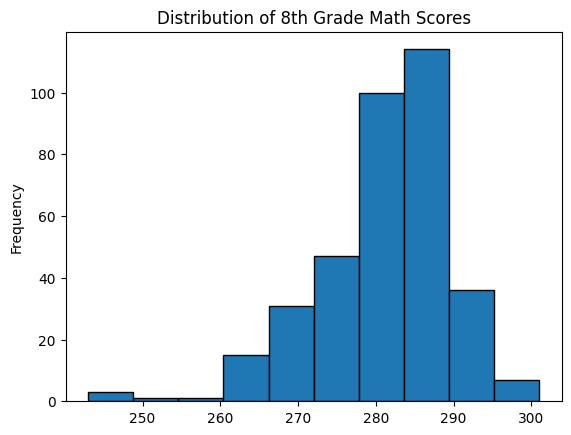

In [28]:
df.AVG_MATH_8_SCORE.plot.hist(title="Distribution of 8th Grade Math Scores", edgecolor="black")
#Can't lie, I'm  a little lost but I am following the tutorial? 

**<CAPTION FOR VIZ 1>** I think its a graph of total spending versus test scores?

**Visualization 2**

AttributeError: module 'matplotlib' has no attribute 'ylabel'

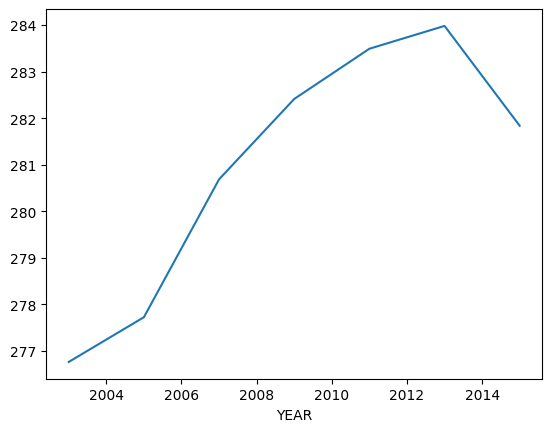

In [29]:
# HELP ITS ALL GOING WRONG WHAT JUMPING INTO DATA SCIENCE DOES TO SOMEONE WITH NO CODING EXPERIENCE AT ALL AUGGHHGHGHGH IM MELTINGG MEELLLLTIIINNNGGG
df.groupby("YEAR")["AVG_MATH_8_SCORE"].mean().plot()
plt.ylabel("AVG_MATH_8_SCORE")
plt.title("8th Grade Math Score Over Time")

**<CAPTION FOR VIZ 2>** Honestly it's so cooked. There's no description other than I tried.


<h2> Data Creation </h2>

_Use this space to create train/test data_

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
# X = enrorllment rate, money spent, and 
# y =  math scores
x = df[["8_ENROLL","TOT_SPENT","TOT_REV"]].dropna()
y = df.loc[x.index]['AVG_MATH_8_SCORE']

In [32]:
# X_train, X_test, y_train, y_test = train_test_split(
#      X, y, test_size=, random_state=42)
# dunnno what Im doinig I just wwant results. This is confusing but I am following?
y.fillna(y.median(), inplace=True)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=0)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [33]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [34]:
# create your model here
# model = LINEAR REGRESSION FROM THE TUTORIAL FOR THE WINNN!!!!!!
model = LinearRegression()

In [35]:
model.fit(x_train, y_train)


LinearRegression()

In [36]:
y_pred = model.predict(x_test)
print(model.intercept_)
print(model.coef_)
#ehhhhh whaat does this mean? uhhhh for some reason the tutorial stopped workking on my end

281.2057294622298
[-6.87797055e-05 -8.35003233e-07  1.25634128e-06]


## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [37]:
model.score(x_test, y_test)
np.mean(model.predict(x_test)-y_test)

# I didn't take stats or any comp sci so I don't know what any of these numbers mean. Hopefully it means that math test scores are closely related to funding and how much they spend!


np.float64(-0.6836561254301396)

In [38]:
np.mean(np.abs(model.predict(x_test)-y_test))

np.float64(6.210002450687912)

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

In [39]:
# col_name = 'COLUMN NAME OF ONE PREDICTOR'

# f = plt.figure(figsize=(12,6))
# plt.scatter(X_train[col_name], y_train, color = "red")
# plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

# plt.legend(['True Training','Predicted Training'])
# plt.xlabel(col_name)
# plt.ylabel('NAME OF THE PREDICTOR')
# plt.title("Model Behavior On Training Set")

col_name = 'AVG_MATH_8_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(x_train[col_name], y_train, color = "red")
plt.scatter(x_train[col_name], model.predict(x_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Reading 8 score')
plt.title("Model Behavior On Training Set")

# I copied and pasted the tutorial, I am not qualified enough to fix this

TypeError: 'module' object is not callable

In [41]:
# col_name = 'COLUMN NAME OF ONE PREDICTOR"

# f = plt.figure(figsize=(12,6))
# plt.scatter(X_test[col_name], y_test, color = "blue")
# plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

# plt.legend(['True testing','Predicted testing'])
# plt.xlabel(col_name)
# plt.ylabel('NAME OF THE PREDICTOR')
# plt.title("Model Behavior on Testing Set")

col_name = 'AVG_MATH_8_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Reading 8 score')
plt.title("Model Behavior on Testing Set")

# same comments as previous cell. Sorry to whoever reviews my work on github. I always thought that the jokes about computer science were hyperbole. 
# But not that I have tried even just a little, I realize that they were not exaggerated at all. 
# Here lies the remnants of my soul and my happiness. When I first started these tutorials, I was like yeah! 
# this is fun! but iits at that point where I'm ao lost I don't even know how lost I am. Thank you for your time and your patience. 
# Hopefully my personality makes me a good fit as there is no way that my coding can be of any use. :))
# dunno what module object is not callable means. Vincent Wu please save me. I like ur musinsa hoodie. Will be buying soon. <3

TypeError: 'module' object is not callable